In [1]:
from __init__ import get_base_path
from dotenv import load_dotenv
from geopy.distance import geodesic
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

# environment
load_dotenv(get_base_path() + '/airbnb.env')
data_dir = get_base_path() + os.getenv('data_dir')

# Load Airbnb data
path = data_dir + 'processed/' + 'airbnb_sample' + '.csv'
airbnb_data = pd.read_csv(path,index_col=0)

# Load Landmarks data
path = data_dir + 'processed/' + 'NYC_famous_landmarks_list' + '.csv'
landmarks_data = pd.read_csv(path,index_col=0)


/Users/kmazurczyk/Desktop/python/AirBnB-Price-Predictor/Downloads/airbnb_pricepredictor-main/Downloads/AirBnB-Price-Predictor-main/AirBnB-Price-Predictor/airbnbenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
airbnb_data['borough'] = airbnb_data.filter(like='neighbourhood_group_cleansed_').idxmax(axis=1).str.replace('neighbourhood_group_cleansed_', '')
airbnb_lat_long = airbnb_data.loc[:,['id','latitude','longitude','borough']].copy()
airbnb_lat_long

,id,latitude,longitude,borough
7347,42273545,40.660070,-73.953720,Brooklyn
15309,1148821271649296263,40.766013,-73.987527,Manhattan
23466,886759118206964183,40.754659,-73.972129,Manhattan
185769,713666857948299920,40.762940,-73.958950,Manhattan
32391,13386091,40.614280,-74.006180,Brooklyn
...,...,...,...,...
24093,13170159,40.580190,-73.954200,Brooklyn
29082,24021046,40.586002,-73.813883,Queens
1445,14672524,40.799810,-73.948040,Manhattan
259246,812492800852380445,40.751067,-73.984676,Manhattan


In [3]:
landmarks_data['landmark'] = landmarks_data['landmark'].str.replace(' ','_').str.lower()
landmarks_data.head()

,landmark,latitude,longitude
0,apollo_theater,40.810018,-73.950056
1,brooklyn_bridge,40.706086,-73.996864
2,brooklyn_museum,40.671206,-73.963631
3,carnegie_hall,40.765126,-73.979924
4,central_park_zoo,40.767706,-73.971991


# Haversine Distances EDA

* min distance landmark
* mean/median distance from landmarks
* n landmarks in 500m (walking distance)

In [4]:
for index, row in landmarks_data.iterrows():
    airbnb_lat_long[row['landmark']+'_dist'] = airbnb_lat_long[['latitude','longitude']].apply(lambda property: geodesic(
                (property['latitude'], property['longitude']),
                (row['latitude'], row['longitude'])
            ).meters, axis=1)

airbnb_lat_long

,id,latitude,longitude,borough,apollo_theater_dist,brooklyn_bridge_dist,brooklyn_museum_dist,carnegie_hall_dist,central_park_zoo_dist,charging_bull_dist,...,new_york_botanical_garden_dist,new_york_public_library_main_branch_dist,radio_city_music_hall_dist,rockefeller_center_dist,saint_patrick's_cathedral_dist,statue_of_liberty_dist,times_square_dist,wall_street_dist,whitney_museum_dist,yankee_stadium_dist
7347,42273545,40.660070,-73.953720,Brooklyn,16654.420091,6278.054009,1493.850241,11874.535601,12052.102859,7143.605971,...,23362.574625,10617.389579,11314.090432,11158.215989,11106.481134,8331.215024,11199.781260,6909.667925,9984.675061,18974.030872
15309,1148821271649296263,40.766013,-73.987527,Manhattan,5820.909902,6701.435527,10719.976441,649.448640,1325.123472,7059.777039,...,14164.884857,1492.770794,925.059564,1100.463254,1261.313190,9789.450926,908.208082,6900.168743,3443.513464,8759.977718
23466,886759118206964183,40.754659,-73.972129,Manhattan,6423.761109,5784.600809,9295.080954,1335.720732,1448.918721,6472.661193,...,14378.813286,870.521380,887.569215,714.688280,557.269092,9494.578164,1191.005262,6227.092106,3525.011991,9185.900824
185769,713666857948299920,40.762940,-73.958950,Manhattan,5281.625124,7079.482057,10194.569618,1787.453823,1221.659810,7859.754579,...,13002.528130,2246.407084,1805.742270,1729.502871,1533.446889,10917.981731,2312.162918,7595.739371,4949.008413,7906.922379
32391,13386091,40.614280,-74.006180,Brooklyn,22247.727789,10225.149578,7274.278131,16897.500748,17281.008070,10156.646297,...,29611.391019,15556.845577,16330.142576,16209.629523,16226.909709,8933.759736,16052.066964,10190.548141,13916.976512,24852.590295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24093,13170159,40.580190,-73.954200,Brooklyn,25524.347519,14438.600581,10138.494310,20651.520574,20877.470952,14798.122523,...,31991.510672,19356.260224,20083.409830,19935.250546,19900.381986,14318.760396,19919.628320,14717.757750,18294.347069,27802.327463
29082,24021046,40.586002,-73.813883,Queens,27409.835174,20429.464028,15812.582224,24346.044165,24203.788710,21476.691686,...,31146.713126,23395.087705,23884.063259,23708.328421,23574.196933,22628.498575,23986.547880,21201.964484,23722.027721,28671.656850
1445,14672524,40.799810,-73.948040,Manhattan,1146.293106,11194.965891,14341.889975,4698.790694,4098.445428,11833.150314,...,9145.829515,5929.042928,5180.349216,5242.887807,5155.582120,14734.771555,5621.899522,11610.986078,8431.733332,3791.928870
259246,812492800852380445,40.751067,-73.984676,Manhattan,7169.168628,5100.153340,9044.958827,1611.972085,2135.794018,5606.263883,...,15313.216090,311.509437,1065.944351,991.469898,1102.208198,8524.867380,770.576413,5401.826712,2407.893785,10025.949855


# Engineer Features

In [ ]:
airbnb_lat_long.filter(regex='_dist$').loc[7347,:].sum()

ValueError: No axis named 1 for object type Series

In [ ]:
airbnb_lat_long['mean_dist_landmarks'] = airbnb_lat_long.filter(regex='_dist$').mean(axis=1)
airbnb_lat_long['median_dist_landmarks'] = airbnb_lat_long.filter(regex='_dist$').median(axis=1)
airbnb_lat_long['num_landmarks_dist_500m'] = airbnb_lat_long.filter(regex='_dist$').map(lambda x: 1 if x <= 500 else 0).sum(axis=1)
airbnb_lat_long['closest_landmark'] = airbnb_lat_long.filter(regex='_dist$').idxmin(axis=1).str.replace("_dist","")

airbnb_lat_long['log_mean_dist_landmarks'] = np.log(airbnb_lat_long['mean_dist_landmarks'])
airbnb_lat_long['log_median_dist_landmarks'] = np.log(airbnb_lat_long['median_dist_landmarks'])
airbnb_lat_long['log_num_landmarks_dist_500m'] = np.log(airbnb_lat_long['median_dist_landmarks'])

In [11]:
airbnb_lat_long

,id,latitude,longitude,borough,apollo_theater_dist,brooklyn_bridge_dist,brooklyn_museum_dist,carnegie_hall_dist,central_park_zoo_dist,charging_bull_dist,...,wall_street_dist,whitney_museum_dist,yankee_stadium_dist,mean_dist_landmarks,median_dist_landmarks,num_landmarks_dist_500m,closest_landmark,log_mean_dist_landmarks,log_median_dist_landmarks,log_num_landmarks_dist_500m
7347,42273545,40.660070,-73.953720,Brooklyn,16654.420091,6278.054009,1493.850241,11874.535601,12052.102859,7143.605971,...,6909.667925,9984.675061,18974.030872,11331.291651,10890.319346,0,brooklyn_museum,9.335323,9.295630,9.295630
15309,1148821271649296263,40.766013,-73.987527,Manhattan,5820.909902,6701.435527,10719.976441,649.448640,1325.123472,7059.777039,...,6900.168743,3443.513464,8759.977718,4590.925856,2504.645152,0,carnegie_hall,8.431837,7.825902,7.825902
23466,886759118206964183,40.754659,-73.972129,Manhattan,6423.761109,5784.600809,9295.080954,1335.720732,1448.918721,6472.661193,...,6227.092106,3525.011991,9185.900824,4361.771176,2596.555524,2,grand_central_station,8.380633,7.861941,7.861941
185769,713666857948299920,40.762940,-73.958950,Manhattan,5281.625124,7079.482057,10194.569618,1787.453823,1221.659810,7859.754579,...,7595.739371,4949.008413,7906.922379,4904.414800,2548.875090,0,central_park_zoo,8.497891,7.843407,7.843407
32391,13386091,40.614280,-74.006180,Brooklyn,22247.727789,10225.149578,7274.278131,16897.500748,17281.008070,10156.646297,...,10190.548141,13916.976512,24852.590295,15805.852933,15847.384793,0,coney_island,9.668136,9.670760,9.670760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24093,13170159,40.580190,-73.954200,Brooklyn,25524.347519,14438.600581,10138.494310,20651.520574,20877.470952,14798.122523,...,14717.757750,18294.347069,27802.327463,19281.843593,19628.321105,0,coney_island,9.866919,9.884729,9.884729
29082,24021046,40.586002,-73.813883,Queens,27409.835174,20429.464028,15812.582224,24346.044165,24203.788710,21476.691686,...,21201.964484,23722.027721,28671.656850,23491.316626,23737.559437,0,coney_island,10.064386,10.074814,10.074814
1445,14672524,40.799810,-73.948040,Manhattan,1146.293106,11194.965891,14341.889975,4698.790694,4098.445428,11833.150314,...,11610.986078,8431.733332,3791.928870,7170.490952,5766.690948,0,apollo_theater,8.877729,8.659854,8.659854
259246,812492800852380445,40.751067,-73.984676,Manhattan,7169.168628,5100.153340,9044.958827,1611.972085,2135.794018,5606.263883,...,5401.826712,2407.893785,10025.949855,4343.337780,2393.070184,2,empire_state_building,8.376398,7.780332,7.780332


# Save to CSVs

In [12]:
#  airbnb landmark relationships full detail
path = data_dir + 'processed/' 
airbnb_lat_long.to_csv(path + 'airbnb_sample_landmark_detail.csv')

In [16]:
# append summary features back to airbnb dataset
features = airbnb_lat_long[['id','mean_dist_landmarks','log_mean_dist_landmarks','median_dist_landmarks','log_median_dist_landmarks','num_landmarks_dist_500m', 'log_num_landmarks_dist_500m']]
airbnb_data = airbnb_data.join(features.set_index('id'),on='id')
airbnb_data.to_csv(path + 'airbnb_cleansed_sample_with_landmark_features.csv')

# EDA

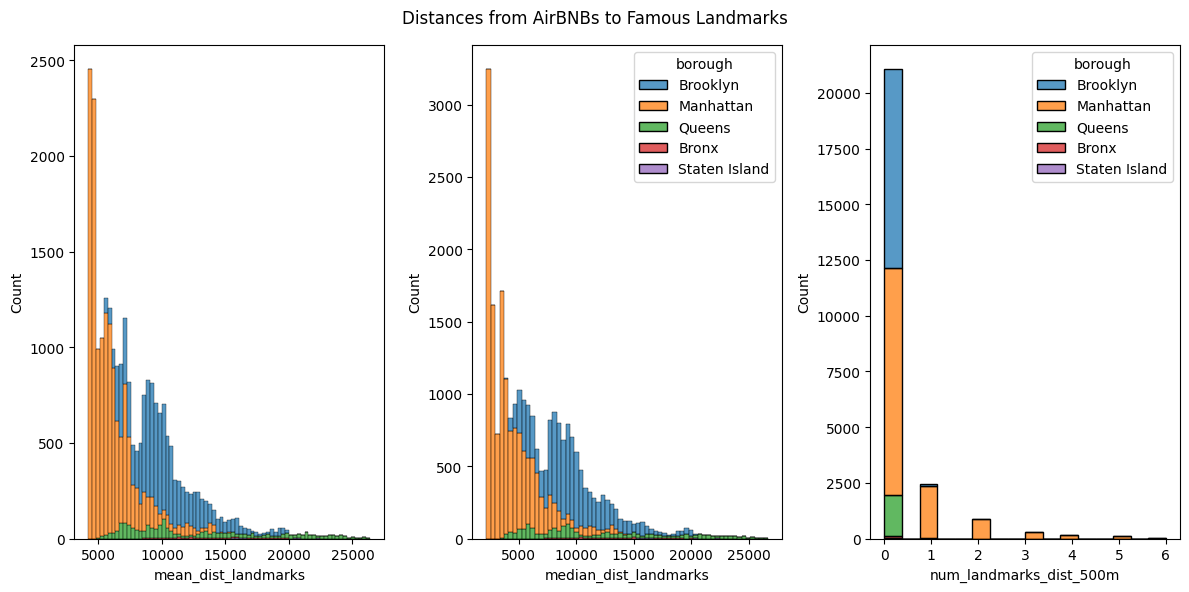

In [17]:
%matplotlib inline

fig, axs = plt.subplots(1,3)
fig.set_size_inches(12,6)

sns.histplot(airbnb_data, x='mean_dist_landmarks', hue='borough', multiple='stack', ax=axs[0])
axs[0].get_legend().set_visible(False)
sns.histplot(airbnb_data, x='median_dist_landmarks', hue='borough', multiple='stack', ax=axs[1])
axs[0].get_legend().set_visible(False)
sns.histplot(airbnb_data, x='num_landmarks_dist_500m', hue='borough', multiple='stack', ax=axs[2])

fig.suptitle('Distances from AirBNBs to Famous Landmarks')
plt.tight_layout()

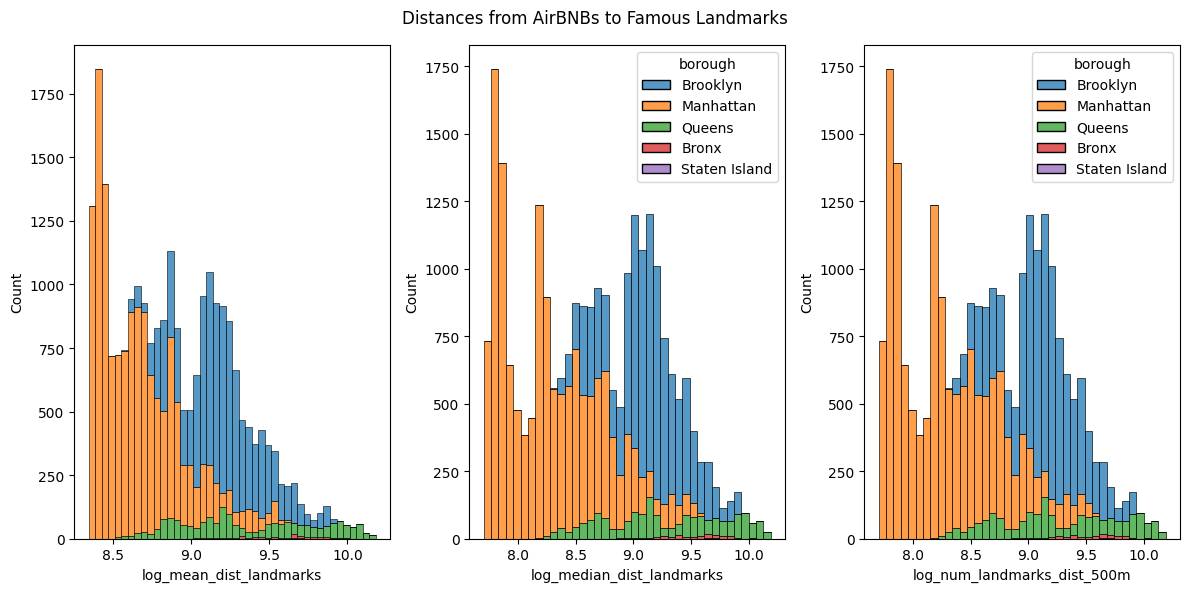

In [18]:
%matplotlib inline

fig, axs = plt.subplots(1,3)
fig.set_size_inches(12,6)

sns.histplot(airbnb_data, x='log_mean_dist_landmarks', hue='borough', multiple='stack', ax=axs[0])
axs[0].get_legend().set_visible(False)
sns.histplot(airbnb_data, x='log_median_dist_landmarks', hue='borough', multiple='stack', ax=axs[1])
axs[0].get_legend().set_visible(False)
sns.histplot(airbnb_data, x='log_num_landmarks_dist_500m', hue='borough', multiple='stack', ax=axs[2])

fig.suptitle('Distances from AirBNBs to Famous Landmarks')
plt.tight_layout()

In [25]:
df_corr = airbnb_data[['price','mean_dist_landmarks','log_mean_dist_landmarks','median_dist_landmarks','log_median_dist_landmarks','num_landmarks_dist_500m', 'log_num_landmarks_dist_500m']].corr().round(2).T
df_corr['price'].sort_values(ascending=False)[1:]

num_landmarks_dist_500m        0.10
mean_dist_landmarks           -0.15
median_dist_landmarks         -0.15
log_mean_dist_landmarks       -0.17
log_median_dist_landmarks     -0.17
log_num_landmarks_dist_500m   -0.17
Name: price, dtype: float64